Homework 10
In this homework, you are going to use and compare two different trackers (of your liking) and compare the results.

Step 1
Decide what video you are going to use for this homework, select an object and generate the template. You can use any video you want (your own, from Youtube, etc.) and track any object you want (e.g. a car, a pedestrian, etc.).

Step 2
Initialize a tracker (e.g. KCF).

Step 3
Run the tracker on the video and the selected object. Run the tracker for around 10-15 frames.

Step 4
For each frame, print the bounding box on the image and save it.

Step 5
Select a different tracker (e.g. CSRT) and repeat steps 2, 3 and 4.

Step 6
Compare the results:

Do you see any differences? If so, what are they?
Does one tracker perform better than the other? In what way?

In [21]:
import cv2
import matplotlib.pyplot as plt

In [30]:
# Path to video
video_path = "/content/sample_video.MP4"
cap = cv2.VideoCapture(video_path)

In [31]:
# Step 1: Loading the video and selecting an object to track(white car)
video_path = "sample_video.MP4"
cap = cv2.VideoCapture(video_path)
x1, y1 = 1250, 700
x2, y2 = 1350, 800
bbox = (x1, y1, x2 - x1, y2 - y1)

In [32]:
# Step 2: Initializing two trackers (KCF and CSRT)
tracker_kcf = cv2.TrackerKCF_create()
tracker_csrt = cv2.TrackerCSRT_create()

In [33]:
# Step 3: Reading the first frame and initializing trackers
ret, frame = cap.read()
tracker_kcf.init(frame, bbox)
tracker_csrt.init(frame, bbox)

frame_count = 0
processed_frames = 0
results_kcf = []
results_csrt = []

while processed_frames < 15:
    ret, frame = cap.read()
    if not ret:
        break

    # Processing only every 20th frame
    if frame_count % 20 == 0:
        frame_kcf = frame.copy()
        frame_csrt = frame.copy()

        # Step 4: Updating trackers and drawing bounding boxes
        ok_kcf, bbox_kcf = tracker_kcf.update(frame_kcf)
        ok_csrt, bbox_csrt = tracker_csrt.update(frame_csrt)

        # Drawing KCF bounding box
        if ok_kcf:
            x, y, w, h = map(int, bbox_kcf)
            cv2.rectangle(frame_kcf, (x, y), (x + w, y + h), (0, 255, 0), 2)
        results_kcf.append(frame_kcf)

        # Drawing CSRT bounding box
        if ok_csrt:
            x, y, w, h = map(int, bbox_csrt)
            cv2.rectangle(frame_csrt, (x, y), (x + w, y + h), (255, 0, 0), 2)
        results_csrt.append(frame_csrt)

        processed_frames += 1

    frame_count += 1

cap.release()

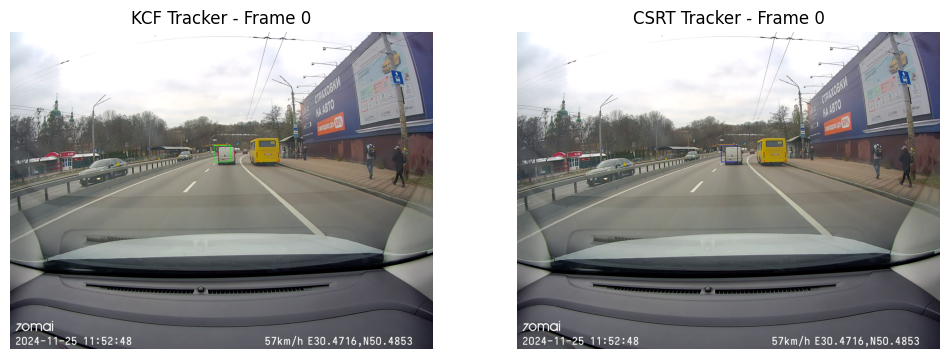

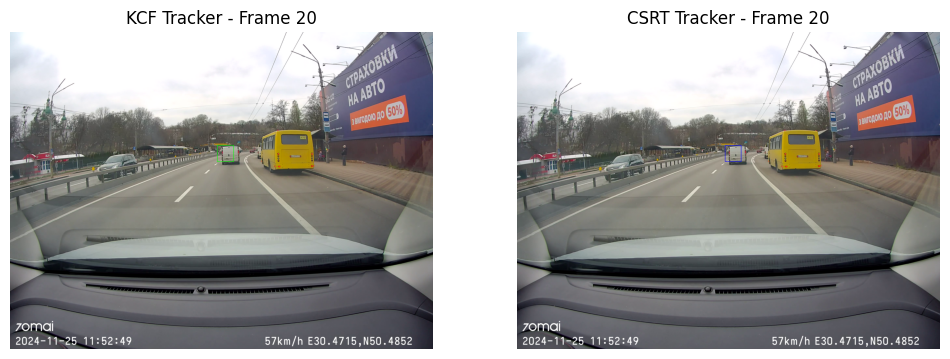

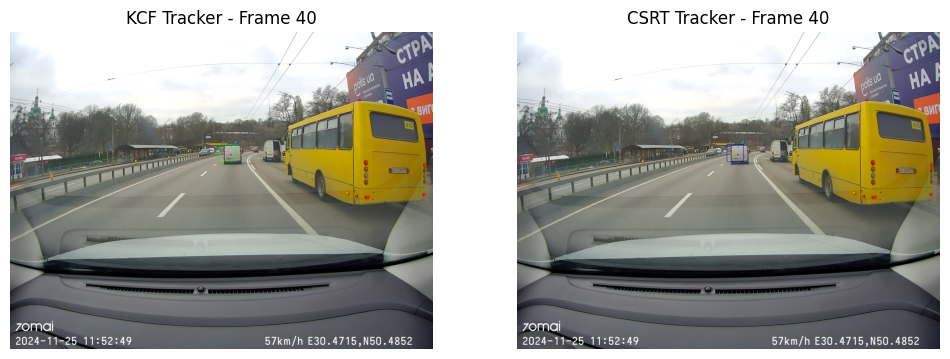

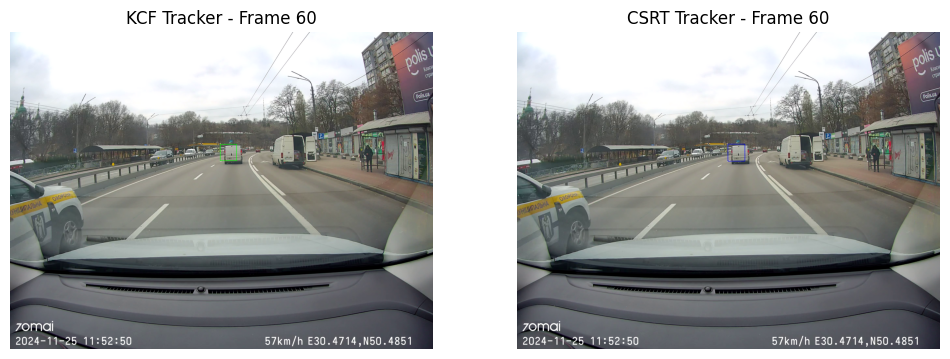

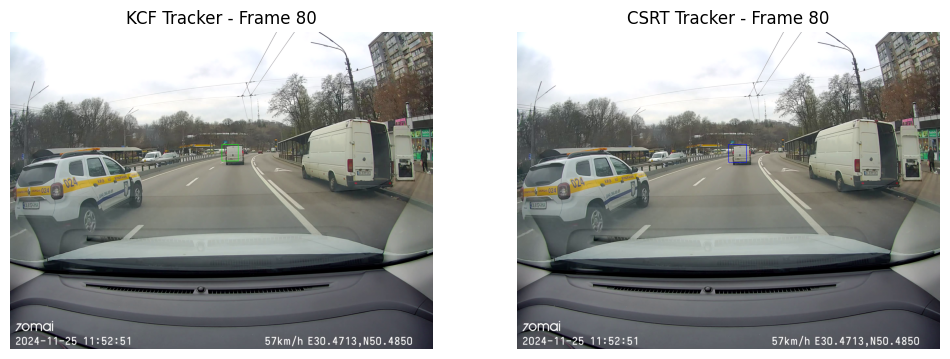

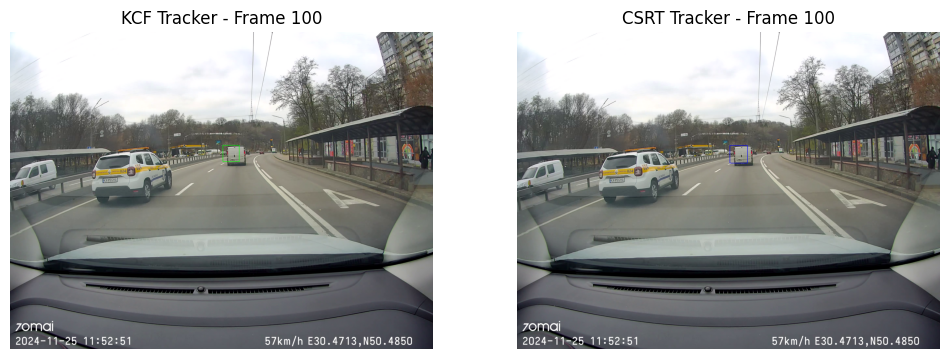

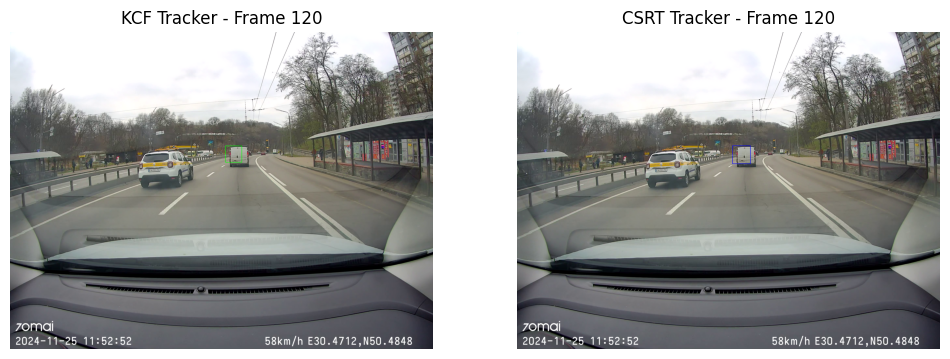

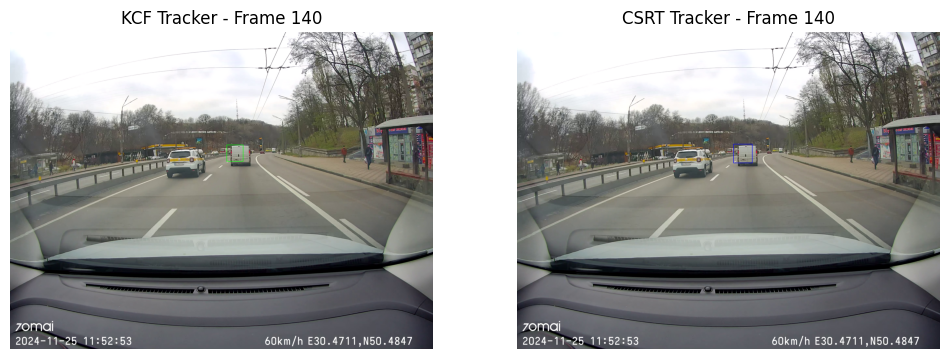

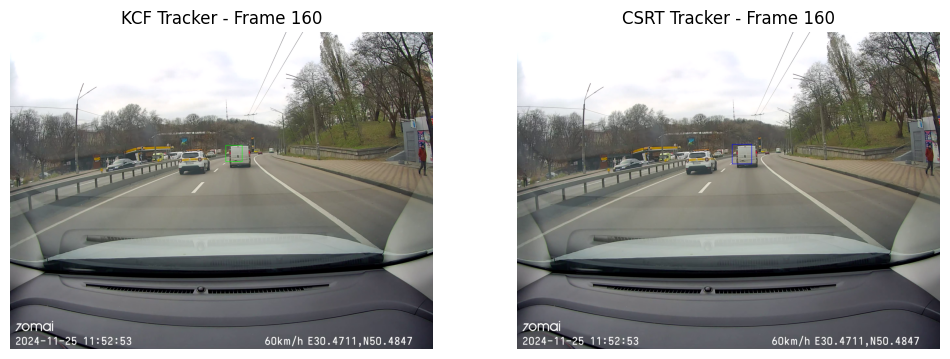

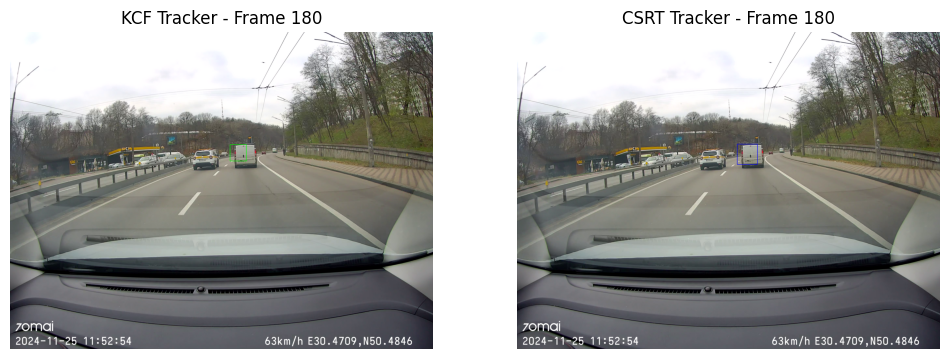

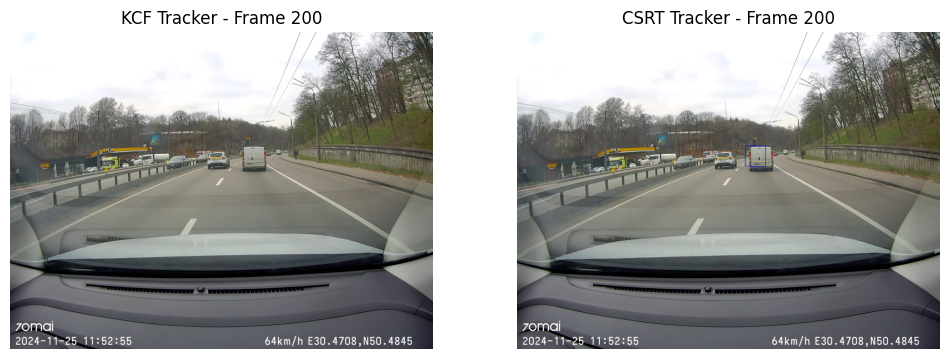

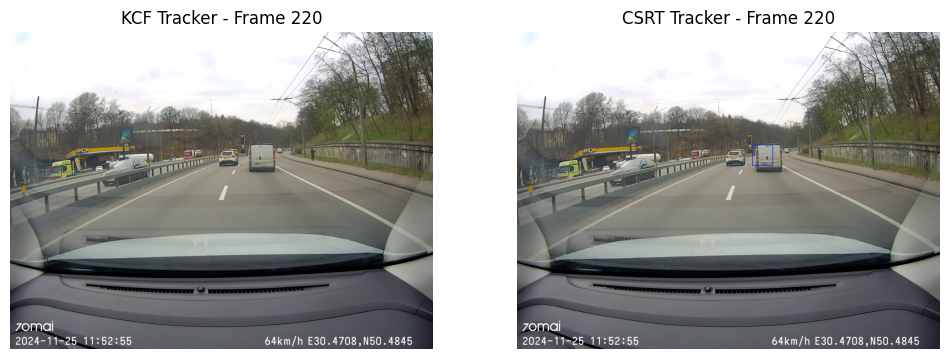

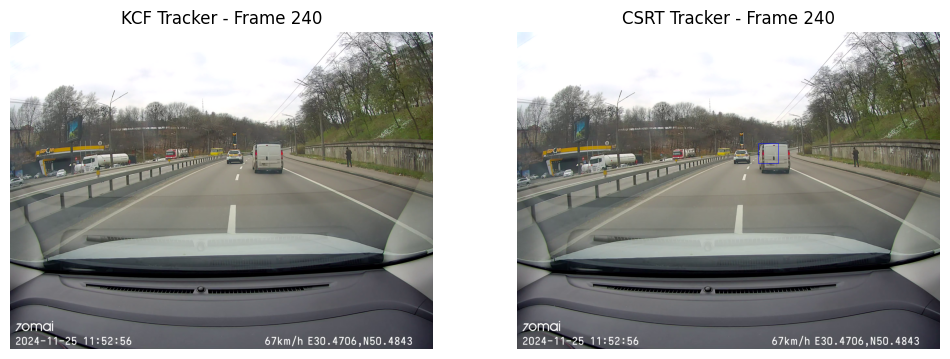

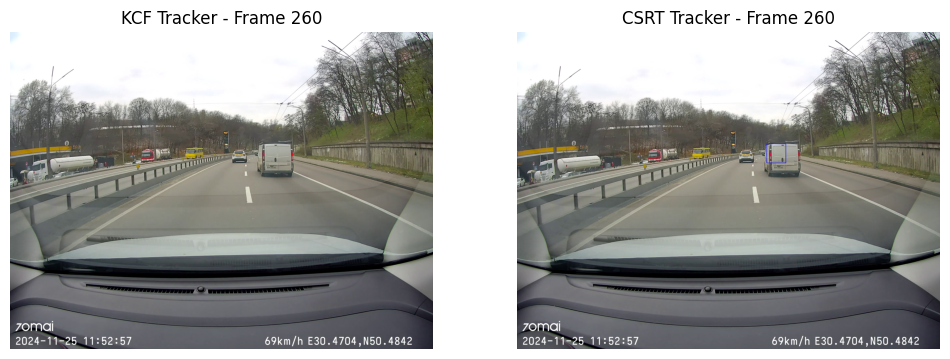

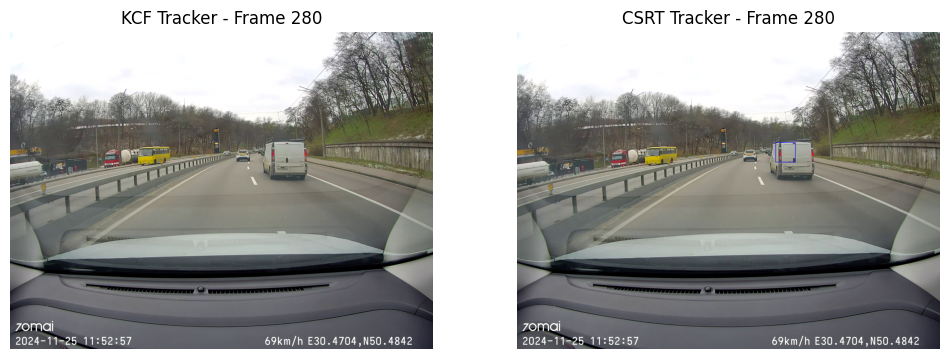

In [35]:
# Step 5: Displaing results side-by-side for KCF and CSRT
for i in range(len(results_kcf)):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # KCF tracker result - green square
    axes[0].imshow(cv2.cvtColor(results_kcf[i], cv2.COLOR_BGR2RGB))
    axes[0].set_title(f"KCF Tracker - Frame {i * 20}")
    axes[0].axis("off")

    # CSRT tracker result - blue square
    axes[1].imshow(cv2.cvtColor(results_csrt[i], cv2.COLOR_BGR2RGB))
    axes[1].set_title(f"CSRT Tracker - Frame {i * 20}")
    axes[1].axis("off")

    plt.show()


> Do you see any differences? If so, what are they?
 Does one tracker perform better than the other? In what way?


KCF lost the car entirely when its size changed (as the car became larger in the image due to camera approach). CSRT continued to track the car accurately, keeping the bounding box on the object until the end. But CSRT doesnt change the box size so I cant say it is a perfect fit here but deffinitely better then KCF, which is unable to recognize the car due to not significant change in the apperance.